In [13]:
import numpy as np
from PIL import Image

In [16]:
img = Image.open('seven.png')
array = np.array(img)
print(array.shape)

(300, 300)


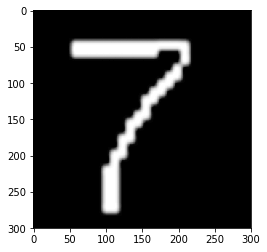

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
plt.imshow(array,interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [27]:
type(array)

numpy.ndarray

In [31]:
filter1 = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])

In [32]:
filter1

array([[-1, -1, -1],
       [ 2,  2,  2],
       [-1, -1, -1]])

In [35]:
def convolution2d(image, kernel, bias):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel) + bias
    return new_image

In [37]:
img_first_layer = convolution2d(array,filter1,1)

In [39]:
img_first_layer.shape

(298, 298)

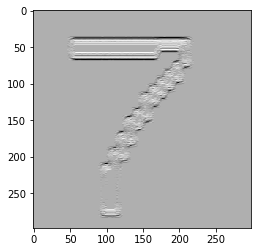

In [40]:
plt.imshow(img_first_layer,interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [48]:
img_after_relu = np.maximum(img_first_layer,0)

In [49]:
img_after_relu

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

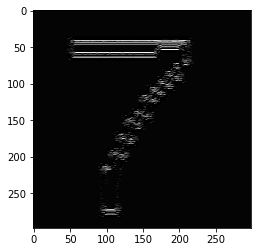

In [50]:
plt.imshow(img_after_relu,interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [41]:
kernel2 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])

In [51]:
from numpy.lib.stride_tricks import as_strided

def pool2d(A, kernel_size, stride, padding, pool_mode='max'):
    '''
    2D Pooling

    Parameters:
        A: input 2D array
        kernel_size: int, the size of the window
        stride: int, the stride of the window
        padding: int, implicit zero paddings on both sides of the input
        pool_mode: string, 'max' or 'avg'
    '''
    # Padding
    A = np.pad(A, padding, mode='constant')

    # Window view of A
    output_shape = ((A.shape[0] - kernel_size)//stride + 1,
                    (A.shape[1] - kernel_size)//stride + 1)
    kernel_size = (kernel_size, kernel_size)
    A_w = as_strided(A, shape = output_shape + kernel_size, 
                        strides = (stride*A.strides[0],
                                   stride*A.strides[1]) + A.strides)
    A_w = A_w.reshape(-1, *kernel_size)

    # Return the result of pooling
    if pool_mode == 'max':
        return A_w.max(axis=(1,2)).reshape(output_shape)
    elif pool_mode == 'avg':
        return A_w.mean(axis=(1,2)).reshape(output_shape)

In [53]:
img_after_maxpooling = pool2d(img_after_relu,kernel_size=2, stride=2, padding=0,pool_mode='max')

In [54]:
img_after_maxpooling.shape

(149, 149)

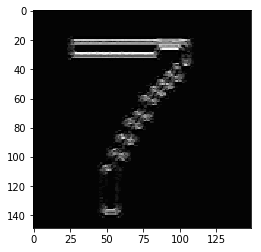

In [55]:
plt.imshow(img_after_maxpooling,interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [57]:
img_second_layer = convolution2d(img_after_maxpooling,filter1,1)

In [58]:
img_second_layer.shape

(147, 147)

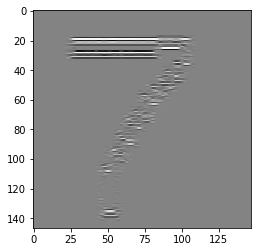

In [59]:
plt.imshow(img_second_layer,interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [60]:
img_second_layer_after_relu = np.maximum(img_second_layer,0)

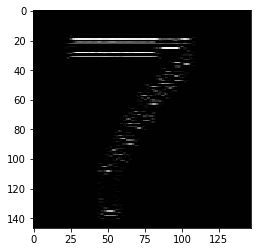

In [61]:
plt.imshow(img_second_layer_after_relu,interpolation='nearest', cmap=cm.Greys_r)
plt.show()

In [62]:
img_second_layer_after_maxpooling = pool2d(img_second_layer_after_relu,kernel_size=2, stride=2, padding=0,pool_mode='max')

In [63]:
img_second_layer_after_maxpooling.shape

(73, 73)

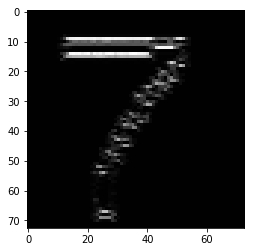

In [64]:
plt.imshow(img_second_layer_after_maxpooling,interpolation='nearest', cmap=cm.Greys_r)
plt.show()